<a href="https://colab.research.google.com/github/lunu5/diveintocode-ml/blob/master/Analysis_of_irises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#[Problem 1] Data acquisition

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
%matplotlib inline
data = load_iris()
x = pd.DataFrame(data.data)
y = pd.DataFrame(data.target)
x.columns = [data.feature_names]
y.columns = ['Species']

##**X =**

In [2]:
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


##**Y =**

In [3]:
y

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


#[Problem 2] Combining data

In [4]:
df = pd.concat([x, y], 1)

##**df =**

In [5]:
df

,"(sepal length (cm),)","(sepal width (cm),)","(petal length (cm),)","(petal width (cm),)",Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


#[Problem 3] Checking the data

##Display the 4th sample from the beginning and see what each feature is like

In [6]:
df.head(4)

,"(sepal length (cm),)","(sepal width (cm),)","(petal length (cm),)","(petal width (cm),)",Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0


##Output the total number of samples for each label

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (sepal length (cm),)  150 non-null    float64
 1   (sepal width (cm),)   150 non-null    float64
 2   (petal length (cm),)  150 non-null    float64
 3   (petal width (cm),)   150 non-null    float64
 4   Species               150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


##Check if there is a missing value in the feature quantity

In [8]:
df.isnull().sum().to_frame()

,0
"(sepal length (cm),)",0
"(sepal width (cm),)",0
"(petal length (cm),)",0
"(petal width (cm),)",0
Species,0


##Display the mean, standard deviation, and quartiles of the feature values at once

In [9]:
df.describe()

,"(sepal length (cm),)","(sepal width (cm),)","(petal length (cm),)","(petal width (cm),)",Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


#[Problem 4] Examining the iris dataset itself



> The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician, eugenicist, and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".

> The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.



#[Problem 5] Extracting the required data


##Extract `sepal_width`, columns in three different ways

###First way

In [10]:
df.iloc[:, 1].to_frame()

,sepal width (cm)
0,3.5
1,3.0
2,3.2
3,3.1
4,3.6
...,...
145,3.0
146,2.5
147,3.0
148,3.4


###Second way

In [11]:
sepal_width = df.columns[1]
df.loc[:, sepal_width: sepal_width]

,"(sepal width (cm),)"
0,3.5
1,3.0
2,3.2
3,3.1
4,3.6
...,...
145,3.0
146,2.5
147,3.0
148,3.4


###Third way

In [12]:
df[sepal_width].to_frame()

,sepal width (cm)
0,3.5
1,3.0
2,3.2
3,3.1
4,3.6
...,...
145,3.0
146,2.5
147,3.0
148,3.4


##Extract the 50th to 99th data

In [13]:
df.iloc[50: 100]

,"(sepal length (cm),)","(sepal width (cm),)","(petal length (cm),)","(petal width (cm),)",Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1
56,6.3,3.3,4.7,1.6,1
57,4.9,2.4,3.3,1.0,1
58,6.6,2.9,4.6,1.3,1
59,5.2,2.7,3.9,1.4,1


##Extract the 50th to 99th data of the `petal_length` column

In [14]:
df.iloc[50: 100, 2].to_frame()

,petal length (cm)
50,4.7
51,4.5
52,4.9
53,4.0
54,4.6
55,4.5
56,4.7
57,3.3
58,4.6
59,3.9


##Extract data with a `petal_width` value of 0.2

In [15]:
df[df.iloc[:, 3] == 0.2]

,"(sepal length (cm),)","(sepal width (cm),)","(petal length (cm),)","(petal width (cm),)",Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
10,5.4,3.7,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
14,5.8,4.0,1.2,0.2,0


##Differences between `loc` and `iloc`


> **`loc` is label-based, which means that you have to specify rows and columns based on their row and column labels.**

> **`iloc` is integer index based, so you have to specify rows and columns by their integer index.**




#[Problem 6] Creating a diagram

##Make a pie chart of the number of samples per label (while showing percentages)

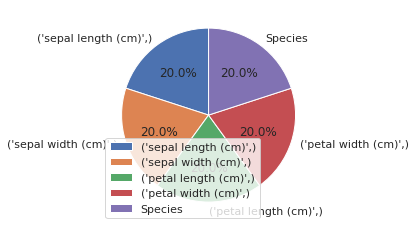

In [16]:
import seaborn as sns
sns.set()
sns.set_theme(style = "whitegrid")
plt.pie(df.count(), labels = df.columns, startangle = 90, autopct = '%1.1f%%')
plt.legend(loc = 0)
plt.show() 

##Select features one by one and visualize the distribution of data for each label using a box plot

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


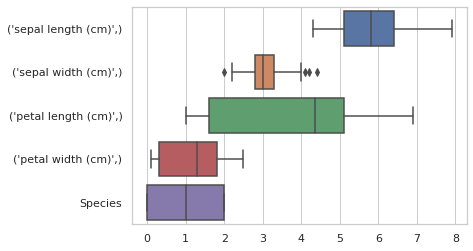

In [17]:
sns.boxplot(data = df, orient = "h")
plt.show() 

##Select features one by one and visualize the distribution of data for each label using a violin plot


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


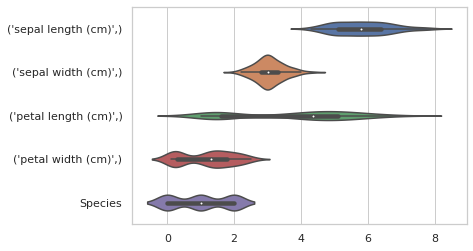

In [18]:
sns.violinplot(data = df, orient = "h")
plt.show() 

##Comparision

> Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator

> Typically a violin plot will include all the data that is in a box plot: a marker for the median of the data; a box or marker indicating the interquartile range; and possibly all sample points, if the number of samples is not too high.

###Box plots advantages


*   Summarizes variation in large datasets visually
*   Shows outliers
*   Compares multiple distributions
*   Indicates symmetry and skewness to a degree

###Violin plots advantages

> Advantage of the violin plot over the box plot is that aside from showing the abovementioned statistics it also shows the entire distribution of the data








#[Problem 7] Confirming the relationship between features

##Take one feature for each of the vertical and horizontal axes and create a color-coded scatter plot for each type (6)

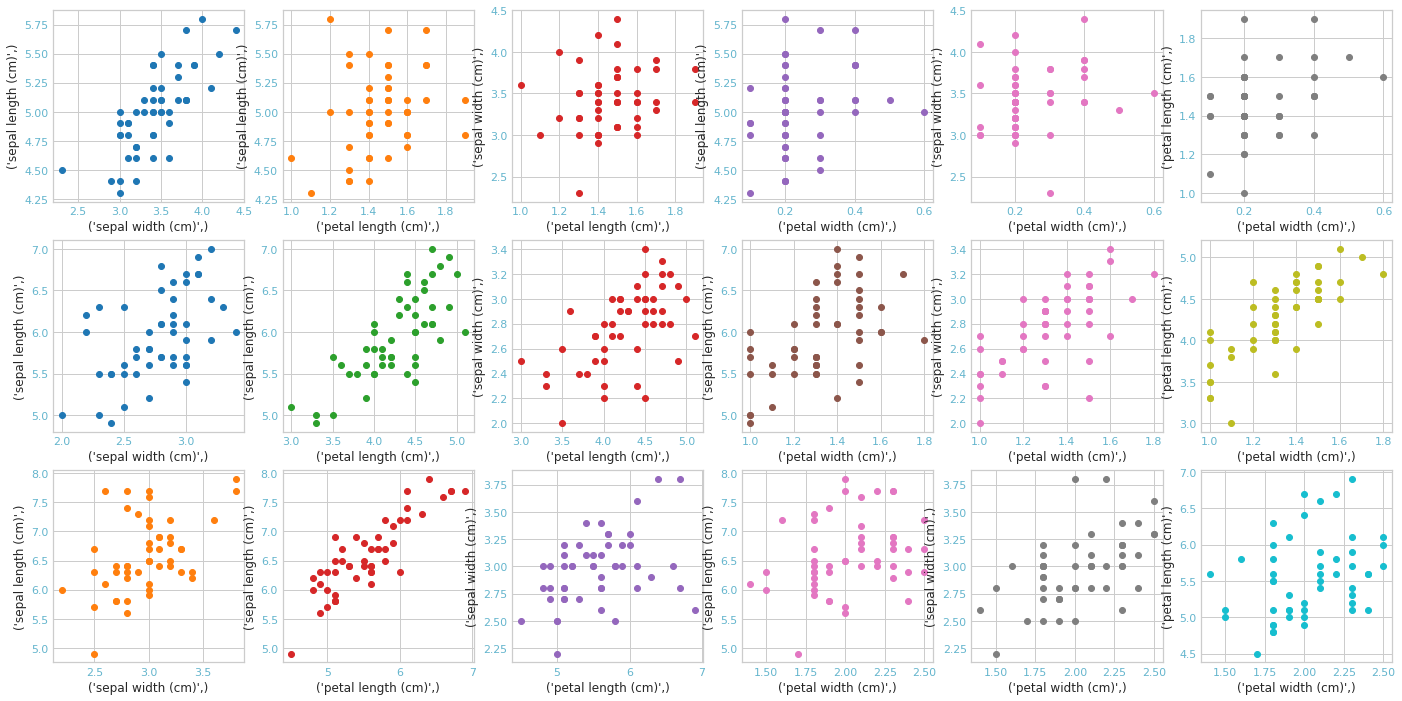

In [19]:
features = 4
species = 3
midwest = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]
fig, axs = plt.subplots(species, features + 2, figsize = (24, 12))
for i in range(species):
  for j in range(features):
    for k in range(j):
      l = j + k if j == 3 else j + k - 1
      axs[i, l].set_xlabel("{}".format(df.columns[j]))
      axs[i, l].set_ylabel("{}".format(df.columns[k]))
      axs[i, l].tick_params(direction = 'out', length = 1, width = 1, colors = 'c')
      axs[i, l].scatter(df[df.iloc[:, 4] == i].iloc[:, j], df[df.iloc[:, 4] == i].iloc[:, k], color = colors[i + l*2])
plt.show()

##すべての組み合わせの散布図を一度に表示させる、散布図行列を作る(１つ)

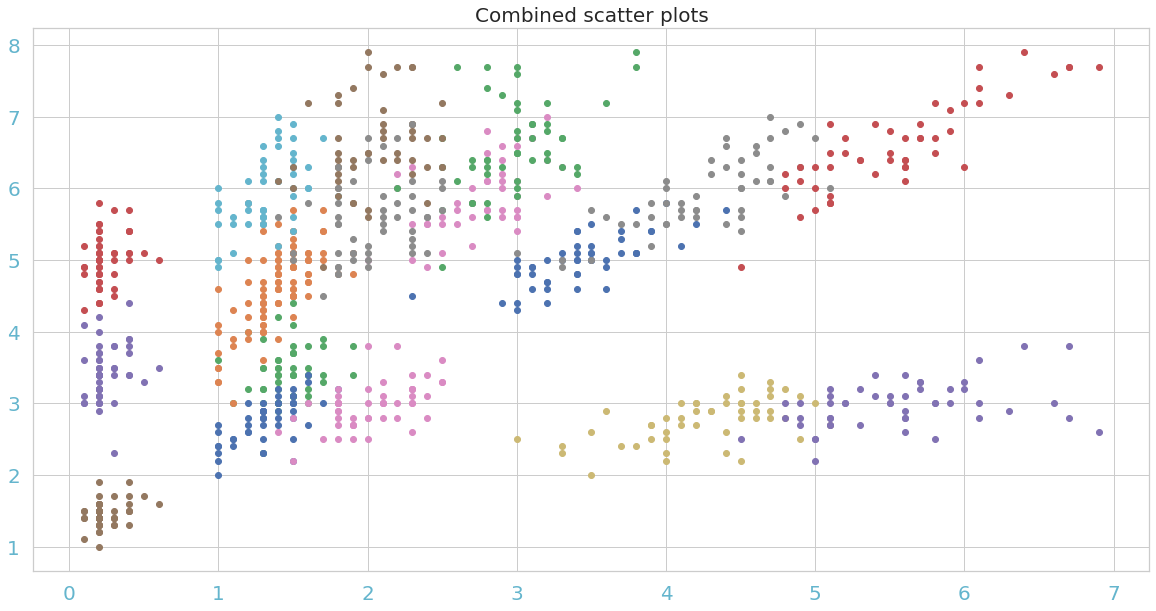

In [20]:
plt.figure(figsize = (20, 10))
for i in range(species):
  for j in range(features):
    for k in range(j):
      l = j + k if j == 3 else j + k - 1
      plt.scatter(df[df.iloc[:, 4] == i].iloc[:, j], df[df.iloc[:, 4] == i].iloc[:, k])
plt.tick_params(direction = 'out', length = 10, width = 1, colors = 'c', labelsize = 20)
plt.title('Combined scatter plots', fontsize = 20)
plt.show()

##Create a correlation coefficient matrix for 4 features

In [21]:
corr = pd.DataFrame.corr(df.iloc[:, :-1])
corr

,"(sepal length (cm),)","(sepal width (cm),)","(petal length (cm),)","(petal width (cm),)"
"(sepal length (cm),)",1.000000,-0.117570,0.871754,0.817941
"(sepal width (cm),)",-0.117570,1.000000,-0.428440,-0.366126
"(petal length (cm),)",0.871754,-0.428440,1.000000,0.962865
"(petal width (cm),)",0.817941,-0.366126,0.962865,1.000000


##Make a heat map of the correlation coefficient matrix (1)

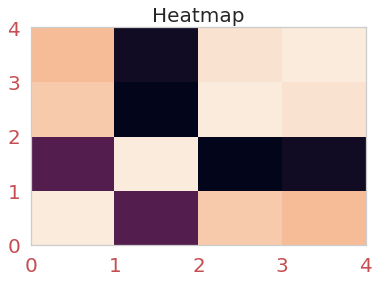

In [22]:
plt.title("Heatmap", fontsize = 20)
plt.tick_params(direction = 'out', length = 1, width = 1, pad = 10, labelsize = 20, colors = 'r')
plt.pcolor(corr)
plt.show()

#[Problem 8] Explaining the results of visualized graphs and tables

> By observing the scatter graphs, it seems that the setosa species have the smallest differences among many samples while the virginica have the largest variance.

> In addition, setosa is the smallest species with the smallest sepal length, petal length and petal width. However, they have the largest sepal width.

> On the other hand, virginica has the biggest sepal length, petal length and petal width and being the largest species among those three.